# Spotify Song Popularity

Identifying atributes of popular songs and build a classification model to predict popularity, based on song attributes.

In [2]:
!pip install numpy

In [14]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [1]:
import pygwalker as pyg

In [29]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [16]:
df_tracks = pd.read_csv('/Users/simon/Root/Work/Data Science/Spotify/Data/SpotifyFeatures.csv')

In [17]:
df_tracks.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


track_id: The Spotify ID for the track

artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

album_name: The album name in which the track appears

track_name: Name of the track

popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

duration_ms: The track length in milliseconds

explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
loudness: The overall loudness of a track in decibels (dB)

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

track_genre: The genre in which the track belongs

According to data definition:
- Remove tracks that are contain more spoken word (>0,7)
- Remove tracks

In [18]:
df_tracks.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [19]:
df_tracks.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [20]:
genre_popularity = df_tracks.groupby("genre").sum("popularity").reset_index()

In [21]:
genre_popularity

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,A Capella,1107,98.763000,49.0580,24331656,29.787200,0.891454,16.29400,-1625.586,5.0473,13270.755,39.1182
1,Alternative,465127,1503.502180,5019.6053,2160514757,6590.799600,567.850938,1824.67100,-60587.457,822.3923,1135036.937,4164.5491
2,Anime,216776,2563.229122,4218.5971,2054717639,5945.624673,2507.370613,1719.20870,-70753.478,581.7554,1131558.142,3946.8690
3,Blues,313485,2958.100686,4766.2360,2273180866,5469.480470,858.764926,2103.48967,-81692.504,557.7036,1093024.901,5228.1524
4,Children's Music,22977,3197.392000,3768.4601,771152761,2144.340189,775.721154,890.92240,-62900.429,633.6604,654472.348,3652.1903
5,Children’s Music,511226,1526.174061,5067.8593,2175081711,6608.980400,508.245919,1823.97250,-61043.929,808.9328,1140421.618,4201.7120
6,Classical,271036,8042.007599,2831.9476,2872506888,1647.418113,5548.274154,1506.96540,-199415.678,481.3193,965787.762,1985.0684
7,Comedy,206618,7677.978293,5412.0490,2277989739,6545.265330,5.555191,7016.54210,-113164.320,8263.0390,951017.763,3995.9661
8,Country,399414,2340.772613,4999.4610,1882145934,5513.060500,48.601199,1622.04360,-63608.426,424.4391,1069262.530,4636.6244
9,Dance,498352,1330.276970,5552.9010,1968731259,6073.876900,308.438143,1633.64100,-52677.955,727.4767,1051045.288,4504.9776


In [41]:
df_tracks.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [22]:
df_tracks.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [23]:
# Drop Missing Values in Track Name Column
df_tracks.dropna(inplace=True)

In [24]:
# Drop duplicates
df_tracks.drop_duplicates(inplace=True)

In [ ]:
# Info 
df_tracks.info(show_counts=True)

In [42]:
# df = df_tracks
# fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
# fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
# fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
# fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
# fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
# fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
# fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
# fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
# fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
# fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
# fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
# fig.update_layout(template='plotly_white',title_x=0.5)

In [43]:
df_tracks['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [45]:
df_tracks.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

Identifying impact of features on popularity

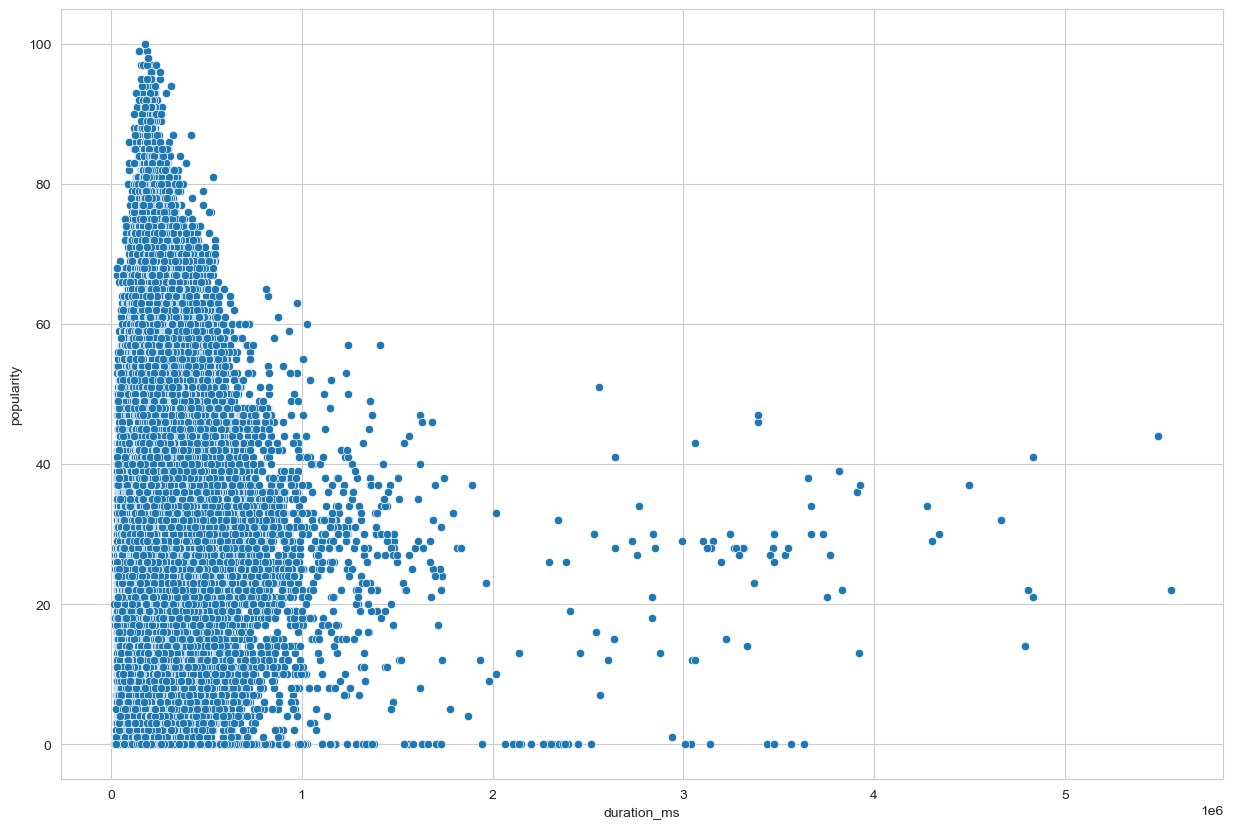

In [66]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_tracks, x="duration_ms", y="popularity")
plt.show()

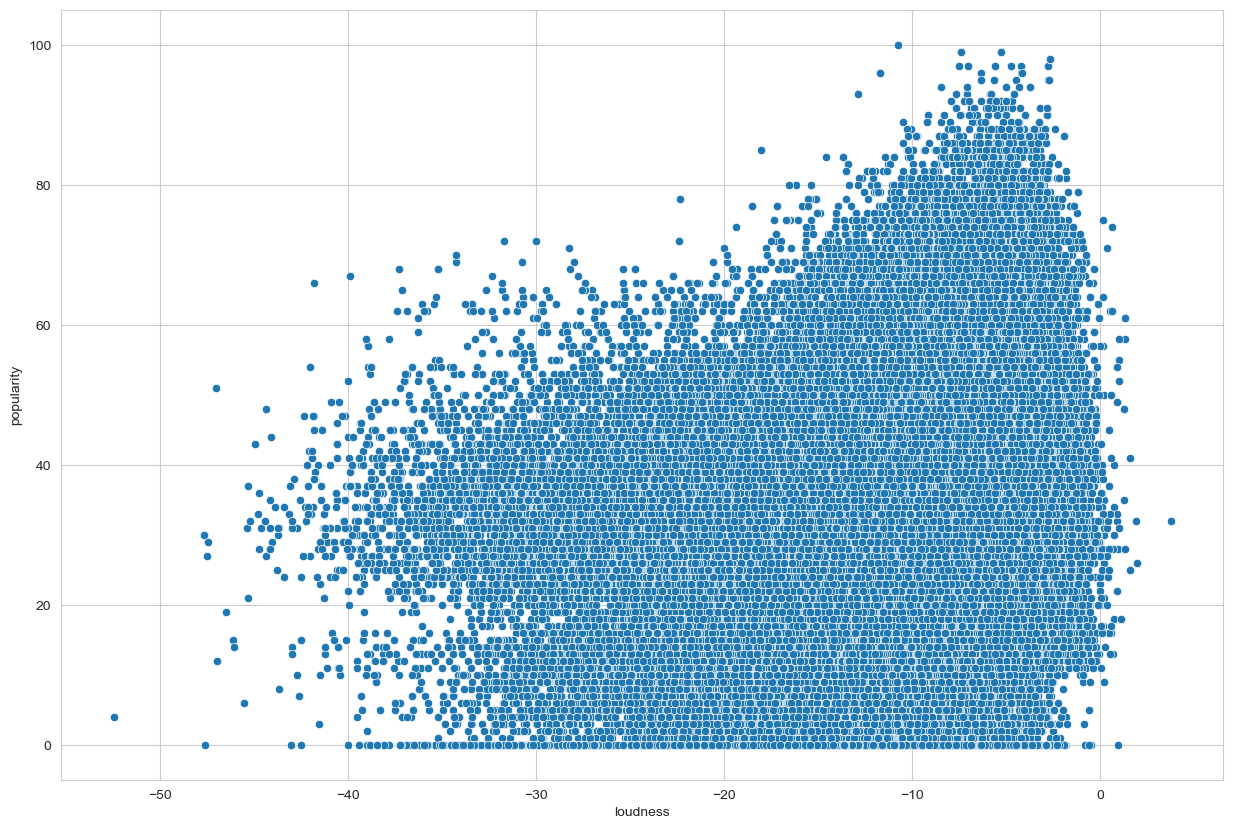

The shorter the songs, the more popular in general

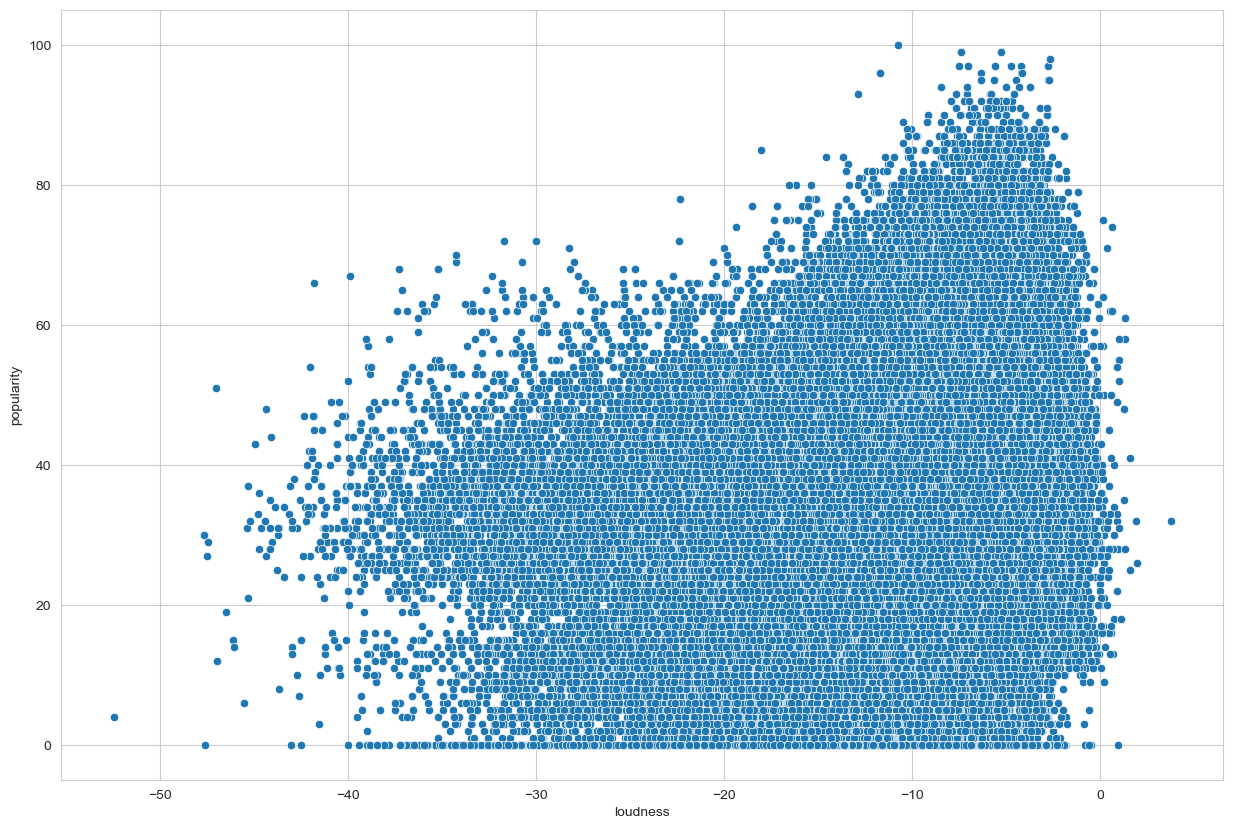

In [70]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_tracks, x="loudness", y="popularity")
plt.show()

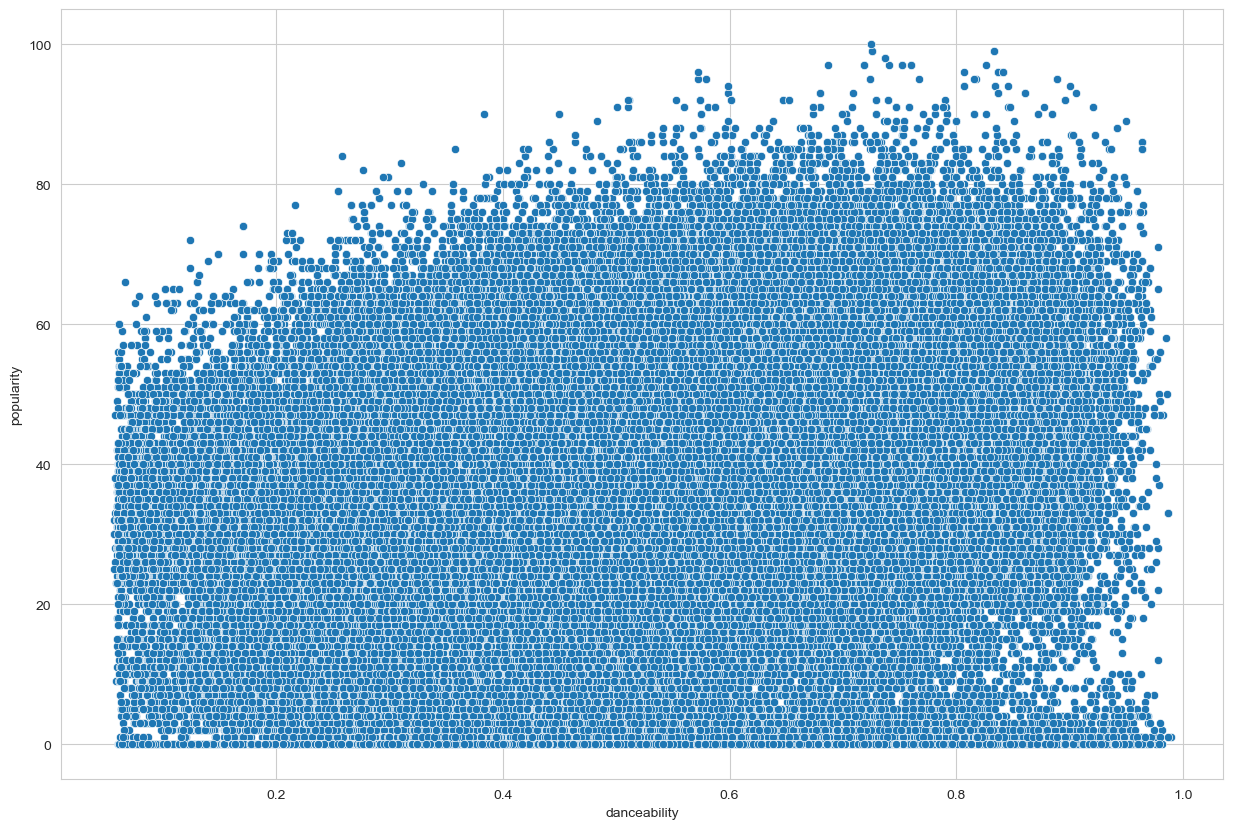

In [71]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_tracks, x="danceability", y="popularity")
plt.show()

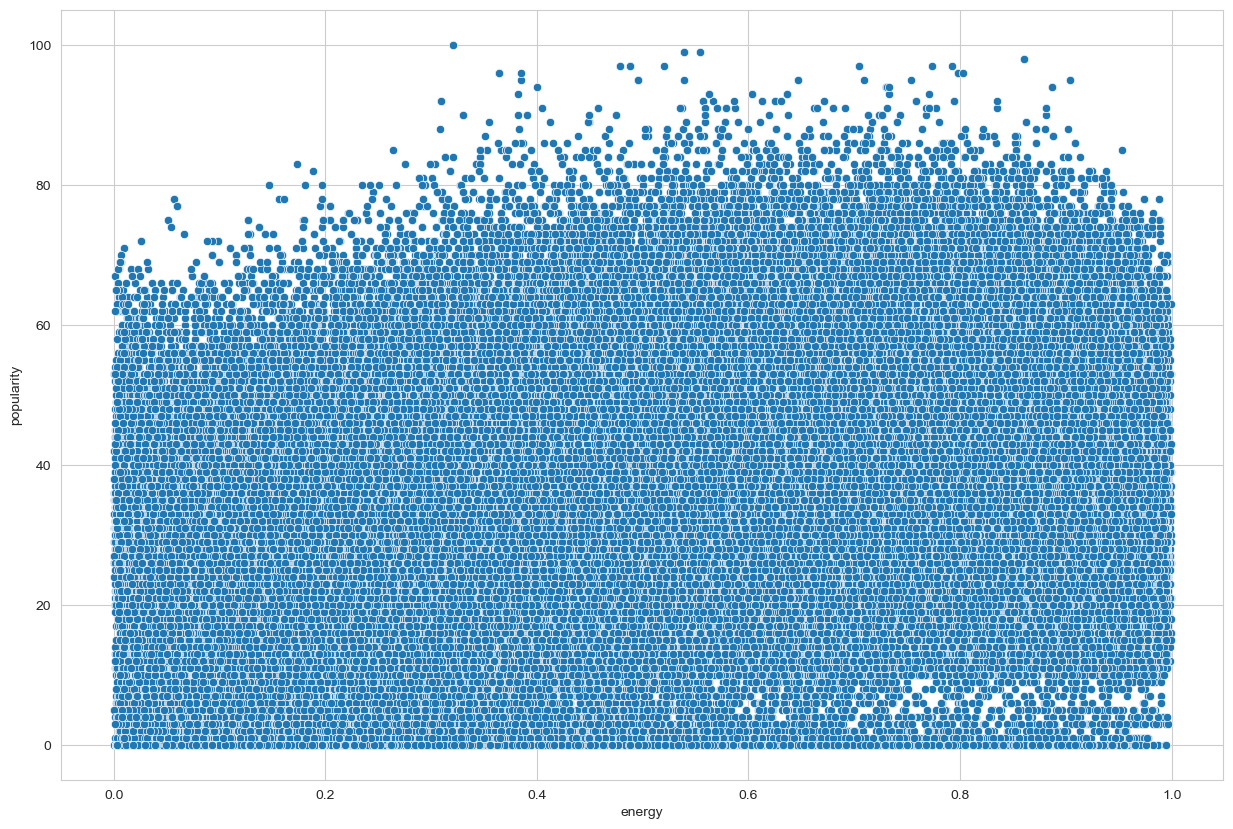

In [73]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_tracks, x="energy", y="popularity")
plt.show()

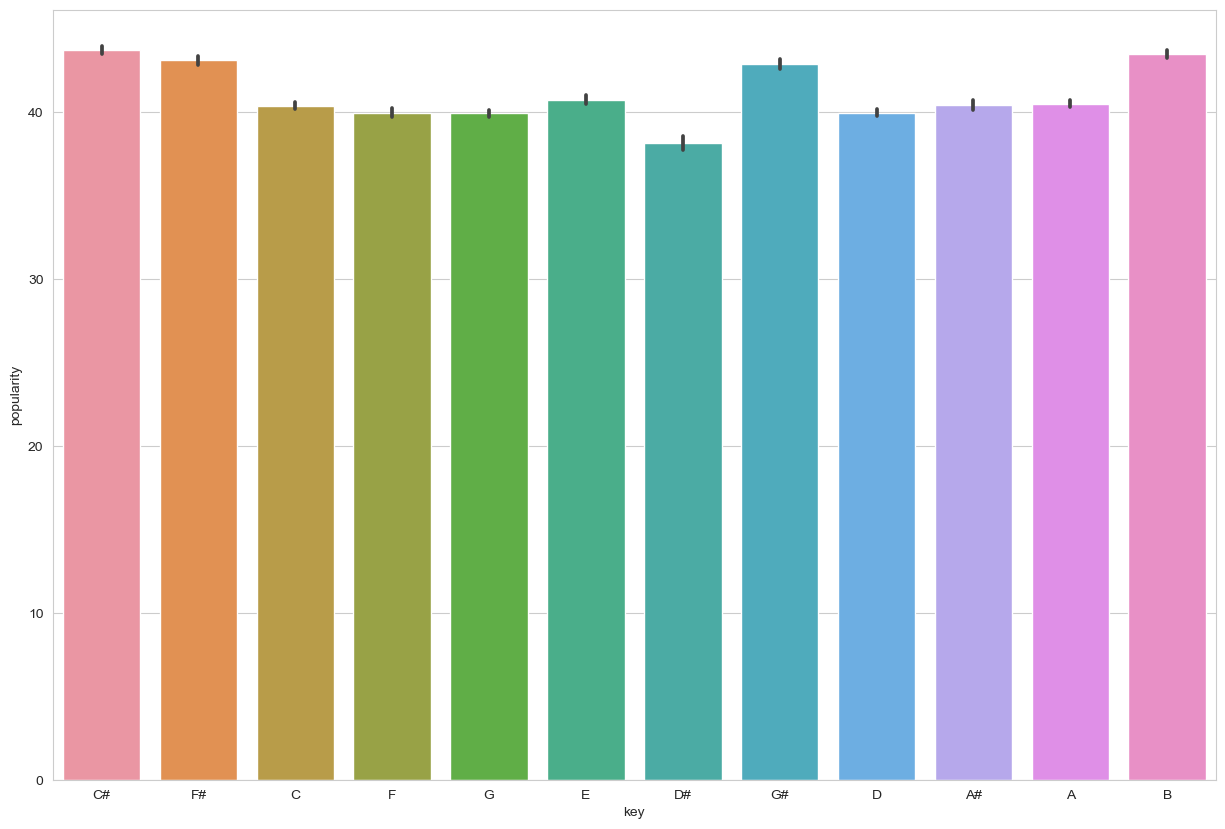

In [76]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_tracks, x="key", y="popularity")
plt.show()

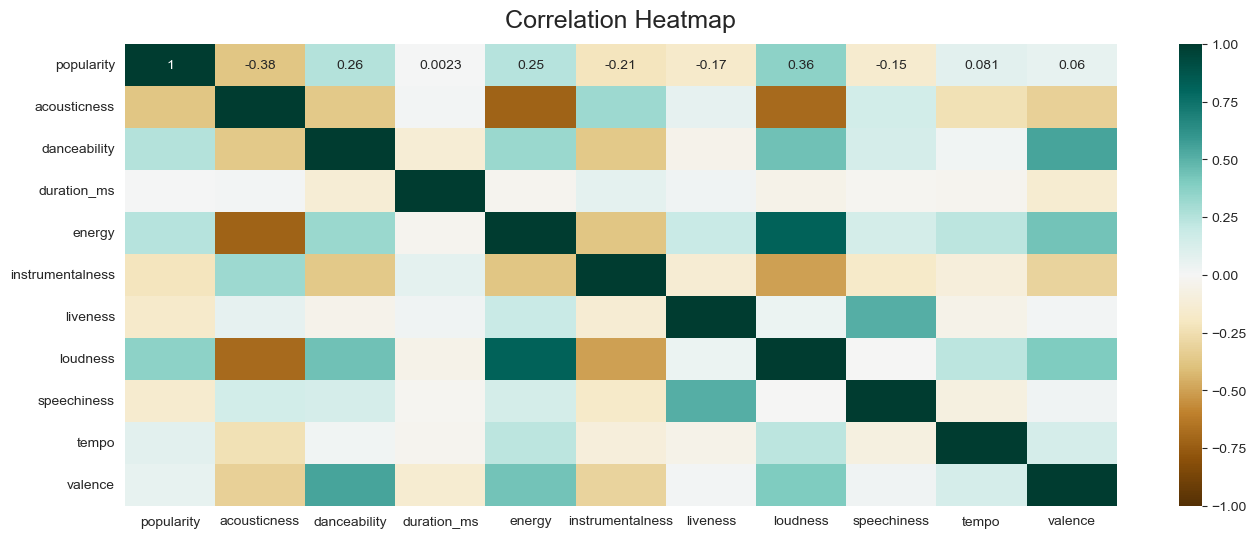

In [72]:
df_tracks_correlation = df_tracks.select_dtypes(include=['number'])
corr = df_tracks_correlation.corr()

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

#### Feature Engineering

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

One Hot Encoding for the genre column

In [78]:
df_tracks = pd.get_dummies(df_tracks, columns=['genre'],dummy_na=True, )

In [81]:
df_tracks = df_tracks.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

In [84]:
df_tracks['key'] = df_tracks['key'].astype(int)

ValueError: invalid literal for int() with base 10: 'C#'

In [86]:
print(df_tracks['key'].unique())

['C#' 'F#' 'C' 'F' 'G' 'E' 'D#' 'G#' 'D' 'A#' 'A' 'B']


In [87]:
keys_mapping = {'C': 0, 
                'C#': 1, 
                'D': 2, 
                'D#': 3,
                'E': 4,
                'F': 5,
                'F#': 6,
                'G': 7,
                'G#': 8,
                'A': 9,
                'A#': 10,
                'B': 11}

In [90]:
df_tracks['key_numberic'] = df_tracks['key'].replace(keys_mapping)

In [92]:
df_tracks = pd.get_dummies(df_tracks, columns=['mode'],dummy_na=True, )


In [94]:
df_tracks = df_tracks.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

In [95]:
df_tracks.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,genre_nan,key_numberic,mode_Major,mode_Minor,mode_nan
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,1,0.3460,-1.828,0.0525,166.969,4/4,0.814,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,6,0.1510,-5.559,0.0868,174.003,4/4,0.816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,1,0
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0,0.1030,-13.879,0.0362,99.488,5/4,0.368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,1,0.0985,-12.178,0.0395,171.758,4/4,0.227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,5,0.2020,-21.150,0.0456,140.576,4/4,0.390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0


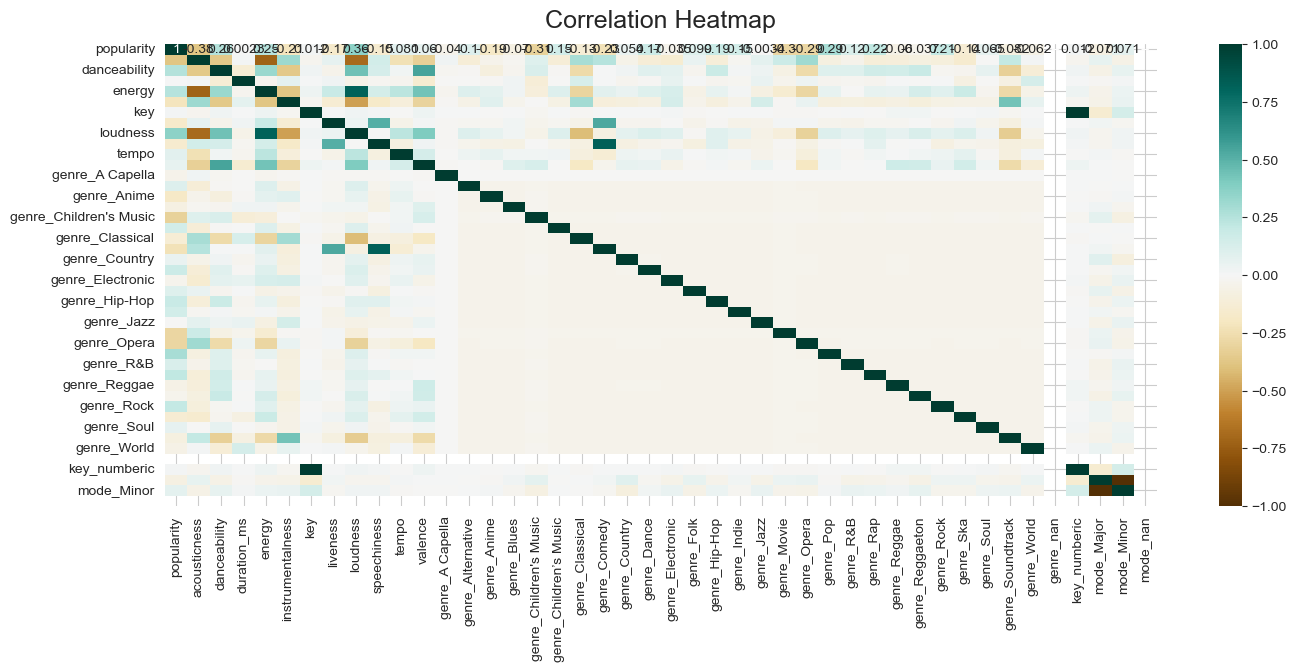

In [97]:
df_tracks_correlation = df_tracks.select_dtypes(include=['number'])
corr = df_tracks_correlation.corr()

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

In [98]:
# Select features based on correlation threshold, for example features with correlation > 0.1 or < -0.1
threshold = 0.1
features = corr.popularity[(corr.popularity.abs() >= threshold) & (corr.popularity.abs() != 1)].index.tolist()

In [101]:
# Split data into features and target variable
X = df_tracks_correlation[features]
y = df_tracks_correlation['popularity']

# Split your data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 102.8900281483787
R^2 Score: 0.6916874072098894


Text(0, 0.5, 'predicted values')

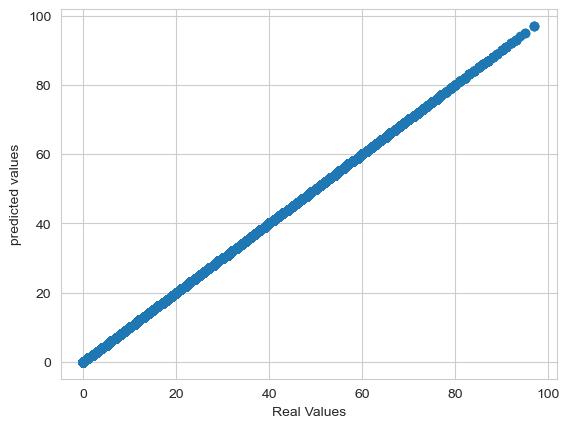

In [104]:
plt.scatter(y_test,y_test)
plt.xlabel("Real Values")
plt.ylabel("predicted values")

<Axes: xlabel='popularity', ylabel='Density'>

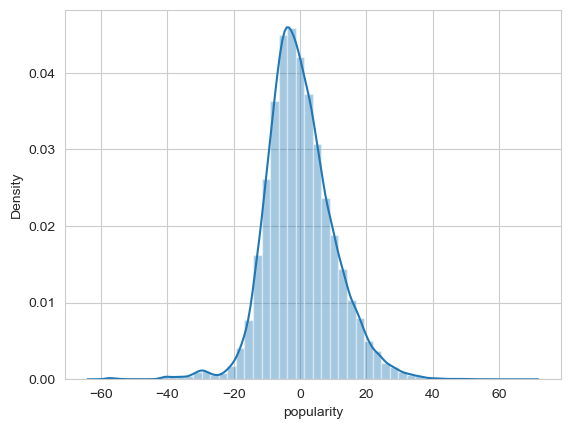

In [103]:
# explore residual
residual = y_test - y_pred
sns.distplot(residual)

### 2nd Model